In [2]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
from scipy.constants import lambda2nu, nu2lambda, c
import os
import imp
import matplotlib.pyplot as plt
import sys

#windows path
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\') 
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')

#linux path
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))


In [88]:
fdtd = lumapi.FDTD(filename= 'Y_Branch.fsp')

## Parameters

In [34]:
w1 = 0.5e-6
w2 = 0.5e-6
w3 = 0.6e-6
w4 = 0.7e-6
w5 = 0.9e-6
w6 = 1.26e-6
w7 = 1.4e-6
w8 = 1.4e-6
w9 = 1.4e-6
w10 = 1.4e-6
w11 = 1.31e-6
w12 = 1.2e-6
w13 = 1.2e-6

w = 2/12*1e-6
height = 0.22e-6
material_core = 'Si (Silicon) - Palik Copy 1'
material_subs = 'SiO2 (Glass) - Palik Copy 1'

In [37]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

fdtd.addrect()
fdtd.set({'name':'rect_1',
'x':0,
'x span':w,
'y':0,
'y span':w1,
'z':0,
'z span':height,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper1',
'x':w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w2,
'width_r':w3,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper2',
'x':2*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w3,
'width_r':w4,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper3',
'x':3*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w4,
'width_r':w5,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper4',
'x':4*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w5,
'width_r':w6,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper5',
'x':5*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w6,
'width_r':w7,
'len':w,
'material':material_core})


fdtd.addrect()
fdtd.set({'name':'rect_2',
'x':7*w,
'x span':3*w,
'y':0,
'y span':w7,
'z':0,
'z span':height,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper6',
'x':9*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w10,
'width_r':w11,
'len':w,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper7',
'x':10*w,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':w11,
'width_r':w12,
'len':w,
'material':material_core})

fdtd.addrect()
fdtd.set({'name':'rect_3',
'x':11*w,
'x span':w,
'y':0,
'y span':w13,
'z':0,
'z span':height,
'material':material_core})

fdtd.addrect()
fdtd.set({'name':'rect_4',
'x min':12*w - w/2,
'x max':12*w - w/2 + 1e-6,
'y':0.35e-6,
'y span':w1,
'z':0,
'z span':height,
'material':material_core})

fdtd.addrect()
fdtd.set({'name':'rect_5',
'x min':12*w - w/2,
'x max':12*w - w/2 + 1e-6,
'y':-0.35e-6,
'y span':w1,
'z':0,
'z span':height,
'material':material_core})

fdtd.addrect()
fdtd.set({'name':'rect_start',
'x min':-w/2 - 1e-6,
'x max':-w/2,
'y':0,
'y span':w1,
'z':0,
'z span':height,
'material':material_core})

xmin = -w/2 - 1e-6 - 5e-6
xmax = 12*w + w/2 + 5e-6
z_span = 4e-6
z = -height/2 - z_span/2

fdtd.addrect()
fdtd.set({'name':'substrato',
'x min':xmin,
'x max':xmax,
'y':0,
'y span':6e-6,
'z':z,
'z span':z_span,
'material':material_subs})

In [89]:
fdtd.switchtolayout()
fdtd.select('FDTD')
fdtd.delete()
fdtd.select('monitor')
fdtd.delete()

mesh = 4

fdtd.addfdtd()
fdtd.set({'x min':-w/2 - 0.5e-6,
'x max':12*w + 0.25e-6,
'y':0,
'y span':4e-6,
'z':0,
'z span':4e-6,
'simulation time':1250e-15,
'mesh accuracy':mesh})

fdtd.addport()
fdtd.set({
'x':-w/2,
'y':0,
'y span':3e-6,
'z':0,
'z span':4e-6
})

fdtd.addport()
fdtd.set({
'direction':'Backward',
'x':12*w-w/2,
'y':0.35e-6,
'y span':0.7e-6,
'z':0,
'z span':4e-6
})

fdtd.addport()
fdtd.set({
'direction':'Backward',
'x':12*w-w/2,
'y':-0.35e-6,
'y span':0.7e-6,
'z':0,
'z span':4e-6
})

fdtd.select('FDTD::ports')
fdtd.set('monitor frequency points',100)

fdtd.addprofile()
fdtd.set({
'x min':-w/2 - 0.5e-6,
'x max':12*w + 0.25e-6,
'y':0,
'y span':4e-6,
'z':0,
'override global monitor settings':1,
'frequency points':100})

LumApiError: 'Operation on closed application'

In [39]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

In [78]:
eField = np.squeeze(fdtd.getelectric("monitor"))

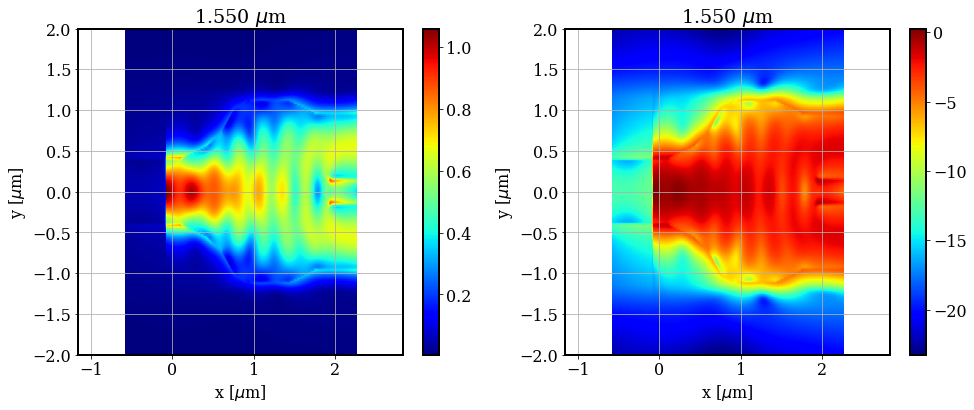

In [85]:
indxLambda = 43
x_efielf = fdtd.getdata("monitor", "x")
y_efielf = fdtd.getdata("monitor", "y")
lmbd = nu2lambda(fdtd.getdata("monitor", "f"))
xmin = 1e6*np.min(x_efielf);
xmax = 1e6*np.max(x_efielf);
ymin = 1e6*np.min(y_efielf);
ymax = 1e6*np.max(y_efielf);

fig1, axs1 = plt.subplots(1,2,figsize=(16,6))
im1 = axs1[0].imshow(np.rot90(np.sqrt(eField[:,:,indxLambda])), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im1, ax=axs1[0])
axs1[0].set_xlabel(r'x [$\mu$m]')
axs1[0].set_ylabel(r'y [$\mu$m]')
axs1[0].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[0].grid(True)
axs1[0].axis('equal')

im2 = axs1[1].imshow(10*np.log10(np.rot90(np.sqrt(eField[:,:,indxLambda]))), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im2, ax=axs1[1])
axs1[1].set_xlabel(r'x [$\mu$m]')
axs1[1].set_ylabel(r'y [$\mu$m]')
axs1[1].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[1].grid(True)
axs1[1].axis('equal')

fig1.tight_layout
plt.rcParams.update({'font.size': 16})

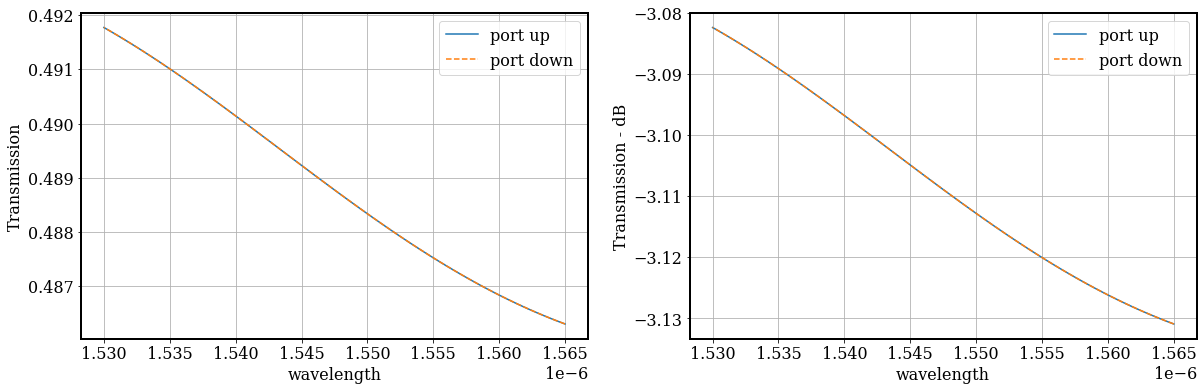

In [80]:
R1 = fdtd.getresult('FDTD::ports::port 1', 'T')
R2 = fdtd.getresult('FDTD::ports::port 2', 'T') ##port3 result
R3 = fdtd.getresult('FDTD::ports::port 3', 'T')

T1 = R1['T']
T2 = R2['T']
T3 = R3['T']

T1_db= 10*np.log10(R1['T'])
T2_db = 10*np.log10(R2['T'])
T3_db = 10*np.log10(R3['T'])
wavelength = R3['lambda']

figure, ax = plt.subplots(1, 2, figsize = (20,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].plot(wavelength,T2, label = 'port up' )
ax[0].plot(wavelength,T3,'--', label = 'port down')
ax[0].set_xlabel('wavelength')
ax[0].set_ylabel('Transmission')
#ax[0].ylim([2, 5])
#ax[0].xlim([1.53e-6,1.565e-6])
ax[0].grid(True)
ax[0].legend(loc = 'upper right')

ax[1].plot(wavelength,T2_db, label = 'port up' )
ax[1].plot(wavelength,T3_db,'--', label = 'port down')
ax[1].set_xlabel('wavelength')
ax[1].set_ylabel('Transmission - dB')
#ax[0].ylim([2, 5])
#ax[0].xlim([1.53e-6,1.565e-6])
ax[1].grid(True)
ax[1].legend(loc = 'upper right')


Text(0.5, 1.0, 'insertion loss - dB')

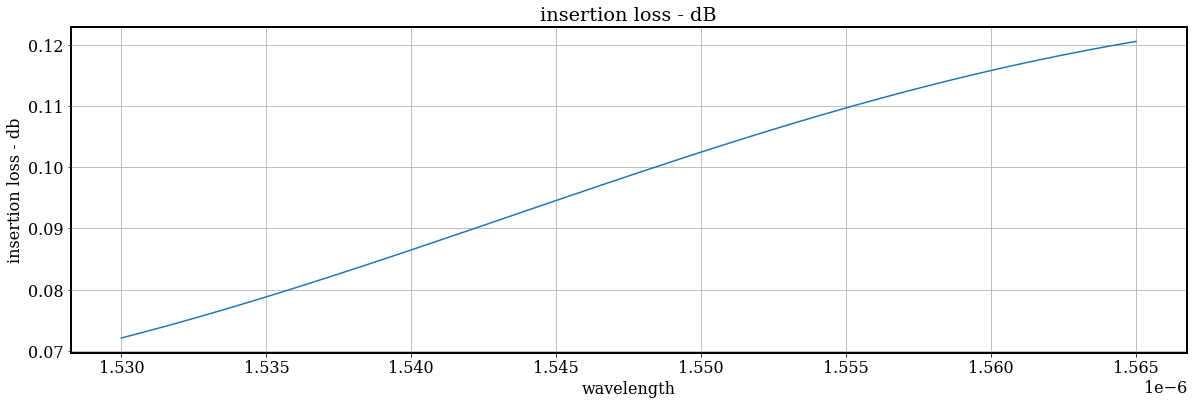

In [87]:
insertion_loss =-(10*np.log10(T2 + T3))

figure = plt.figure(figsize = (20,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

plt.plot(wavelength, insertion_loss)
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('insertion loss - db')
plt.title('insertion loss - dB')